In [8]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [12]:
df = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/New folder/Jupyter/creditcard.csv")

In [13]:
# Step 3: Preprocessing
scaler = StandardScaler()
df["Amount"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))
df["Time"] = scaler.fit_transform(df["Time"].values.reshape(-1, 1))

In [14]:
# Step 4: Feature and Target Split
X = df.drop("Class", axis=1)
y = df["Class"]


In [15]:

# Step 5: Train-Test Split with Stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [17]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="Could not find the number of physical cores")


In [18]:
# Step 6: Handle Class Imbalance with SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

In [19]:
# Step 7: Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_resampled, y_resampled)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [20]:
# Step 8: Predictions
y_pred = model.predict(X_test)

In [21]:
# Step 9: Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.79      0.83       148

    accuracy                           1.00     85443
   macro avg       0.93      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443



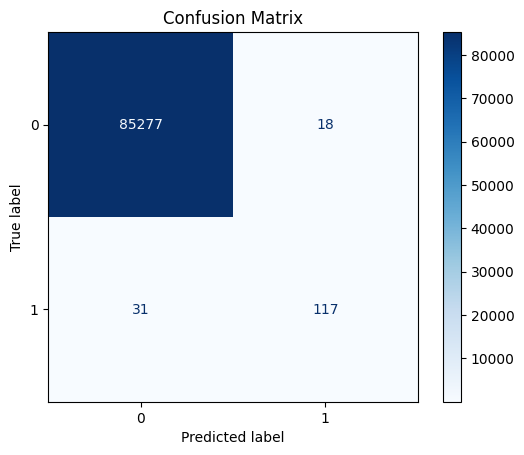

In [22]:
# Step 10: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
